<font color = "#c14632">
    
# Project 1 - DAT 402
</font> 

### Jennifer Vesper
   
    


## Global Earth Temperatures


 - The goal of this project is to analyze global Earth temperature data using a dataset obtained from: [Kaggle - Global Earth Temperatures](https://www.kaggle.com/datasets/joebeachcapital/global-earth-temperatures/data). <br>
 
 - The dataset contains variables such as monthly, 5 year, 10 year, and 20 year temperature anomalies on global earth temperatures from 1850 - 2023<br>
 
 - Using machine learning modeling this project will look at global temperatures and how they could potentially increase due to the impact of climate change. 
 
 - Machine learning model K-nearest neighbors will be implemented to predict temperatures based on relevant features, and the model's performance will be evaluated and interpreted.

 


<div style="text-align: center;">
    <img src="https://nmcdn.io/e186d21f8c7946a19faed23c3da2f0da/8ed2672177464f2e9b193130d1000c50/files/blog/what-climate-change-looks-like-in-6-gifs/climate_change_map.gif" alt="TS" title="Title text" style="margin:auto;" width='400' />
</div>

## 1. Importing Libraries

In [388]:
library(digest)
library(stringr)
library(ggplot2)
library(tidyverse)
library(kknn)

In [389]:
df = read.csv('Global Temperature.csv')

In [390]:
head(df)

,Year,Month,Monthly.Anomaly,Monthly.Unc.,Annual.Anomaly,Annual.Unc,Five.Year.Anomaly,Five.Year.Unc.,Ten.Year.Anomaly,Ten.Year.Unc.,Twenty.Year.Anomaly,Twenty.year.Unc.
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1850,5,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1850,6,-0.528,0.448,-0.326,0.189,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
tail(df)

,Year,Month,Monthly.Anomaly,Monthly.Unc.,Annual.Anomaly,Annual.Unc,Five.Year.Anomaly,Five.Year.Unc.,Ten.Year.Anomaly,Ten.Year.Unc.,Twenty.Year.Anomaly,Twenty.year.Unc.
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2072,2022,8,1.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,2022,9,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2074,2022,10,1.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075,2022,11,0.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2076,2022,12,0.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2077,2023,1,0.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <mark> Above we can see that the head and the tail of this dataset both have a lot of NaN values that will need to be cleaned up</mark>
***
#### <mark>Below you can see that more recent data does not have any null values</mark>

In [392]:
subset_df = df[df$Year >= 1990 & df$Year <= 2000, ] #10 years
subset_df[1:10, ]

,Year,Month,Monthly.Anomaly,Monthly.Unc.,Annual.Anomaly,Annual.Unc,Five.Year.Anomaly,Five.Year.Unc.,Ten.Year.Anomaly,Ten.Year.Unc.,Twenty.Year.Anomaly,Twenty.year.Unc.
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1681,1990,1,0.463,0.043,0.473,0.027,0.410,0.02,0.328,0.018,0.361,0.017
1682,1990,2,0.376,0.035,0.475,0.027,0.408,0.02,0.337,0.018,0.362,0.017
1683,1990,3,0.912,0.043,0.465,0.028,0.399,0.02,0.341,0.018,0.363,0.017
1684,1990,4,0.691,0.046,0.473,0.029,0.396,0.02,0.344,0.018,0.364,0.017
1685,1990,5,0.543,0.046,0.503,0.028,0.393,0.02,0.344,0.018,0.364,0.017
1686,1990,6,0.411,0.055,0.501,0.028,0.387,0.02,0.348,0.018,0.365,0.017
1687,1990,7,0.514,0.051,0.499,0.027,0.384,0.02,0.354,0.018,0.366,0.017
1688,1990,8,0.368,0.048,0.518,0.027,0.387,0.02,0.357,0.018,0.366,0.017
1689,1990,9,0.271,0.076,0.465,0.027,0.386,0.02,0.360,0.018,0.367,0.017


## 2. Data Cleaning

### <mark>  a. First identify the NaNs </mark>

In [404]:
nans = which(is.na(df), arr.ind = TRUE)
print(nans[1:10, ])

       row col
 [1,] 2065   4
 [2,] 2066   4
 [3,] 2067   4
 [4,] 2068   4
 [5,] 2069   4
 [6,] 2070   4
 [7,] 2071   4
 [8,] 2072   4
 [9,] 2073   4
[10,] 2074   4


### <mark>  b. Second remove the NaNs </mark>

In [394]:
#Remove NaNs
noNans = na.omit(df)

### <mark>  c. Remove the last 2 columns for conciseness </mark>

In [396]:
df = df[, -c((ncol(df) - 1):ncol(df))]

print(names(df))

 [1] "Year"              "Month"             "Monthly.Anomaly"  
 [4] "Monthly.Unc."      "Annual.Anomaly"    "Annual.Unc"       
 [7] "Five.Year.Anomaly" "Five.Year.Unc."    "Ten.Year.Anomaly" 
[10] "Ten.Year.Unc."    


### <mark>  d. Slice to only use data from 1940 to 2021 as this is where the bulk of the information is </mark>

In [397]:
temps = subset(df, Year >= 1940 & Year <= 2021) #newdf

head(temps)
tail(temps)

,Year,Month,Monthly.Anomaly,Monthly.Unc.,Annual.Anomaly,Annual.Unc,Five.Year.Anomaly,Five.Year.Unc.,Ten.Year.Anomaly,Ten.Year.Unc.
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1081,1940,1,0.076,0.108,0.164,0.084,0.109,0.076,0.073,0.083
1082,1940,2,0.274,0.110,0.143,0.088,0.106,0.078,0.069,0.084
1083,1940,3,0.203,0.129,0.149,0.089,0.103,0.080,0.071,0.085
1084,1940,4,0.351,0.119,0.174,0.089,0.097,0.082,0.076,0.087
1085,1940,5,0.007,0.113,0.168,0.089,0.097,0.084,0.078,0.088
1086,1940,6,0.003,0.146,0.130,0.088,0.100,0.086,0.081,0.089


,Year,Month,Monthly.Anomaly,Monthly.Unc.,Annual.Anomaly,Annual.Unc,Five.Year.Anomaly,Five.Year.Unc.,Ten.Year.Anomaly,Ten.Year.Unc.
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2059,2021,7,0.989,0.052,0.942,NaN,NaN,NaN,NaN,NaN
2060,2021,8,1.030,0.054,0.963,NaN,NaN,NaN,NaN,NaN
2061,2021,9,1.062,0.058,0.976,NaN,NaN,NaN,NaN,NaN
2062,2021,10,1.160,0.037,0.984,NaN,NaN,NaN,NaN,NaN
2063,2021,11,0.967,0.046,0.983,NaN,NaN,NaN,NaN,NaN
2064,2021,12,0.927,0.052,0.997,NaN,NaN,NaN,NaN,NaN


### <mark> As you can see now the head has no NaNs and the tail has less than previously seen</mark>

## 3. Visualizing the dataset

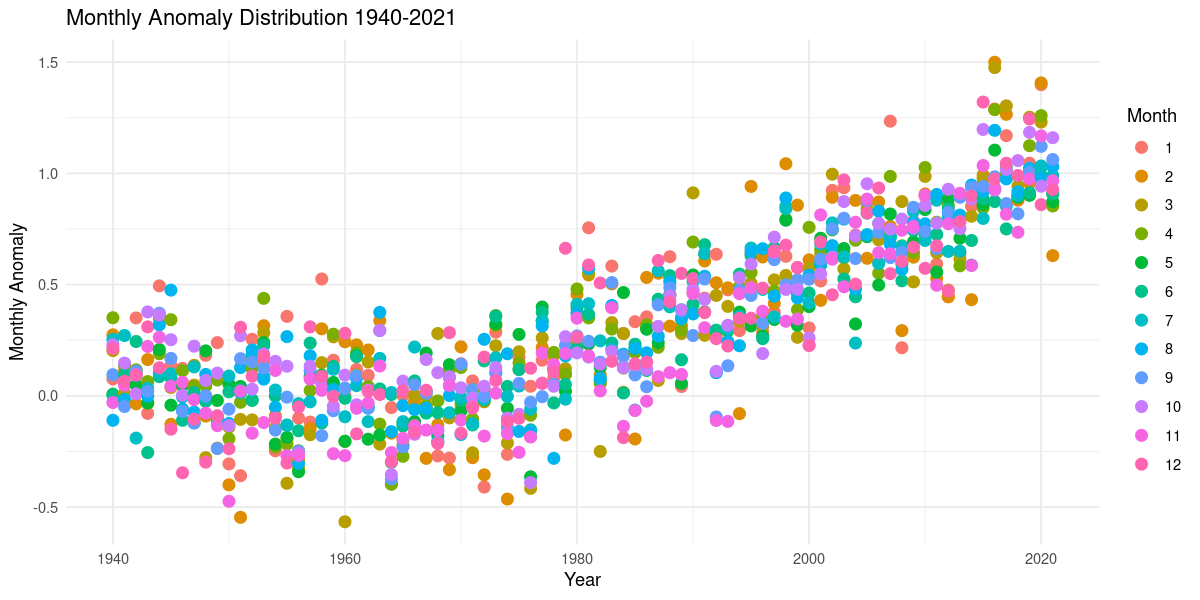

In [398]:
ggplot(temps, aes(x = Year, y = Monthly.Anomaly, color = factor(Month))) +
  geom_point(size = 3) +
  labs(title = 'Monthly Anomaly Distribution 1940-2021',
       x = 'Year',
       y = 'Monthly Anomaly',
       color = 'Month') +
  theme_minimal()

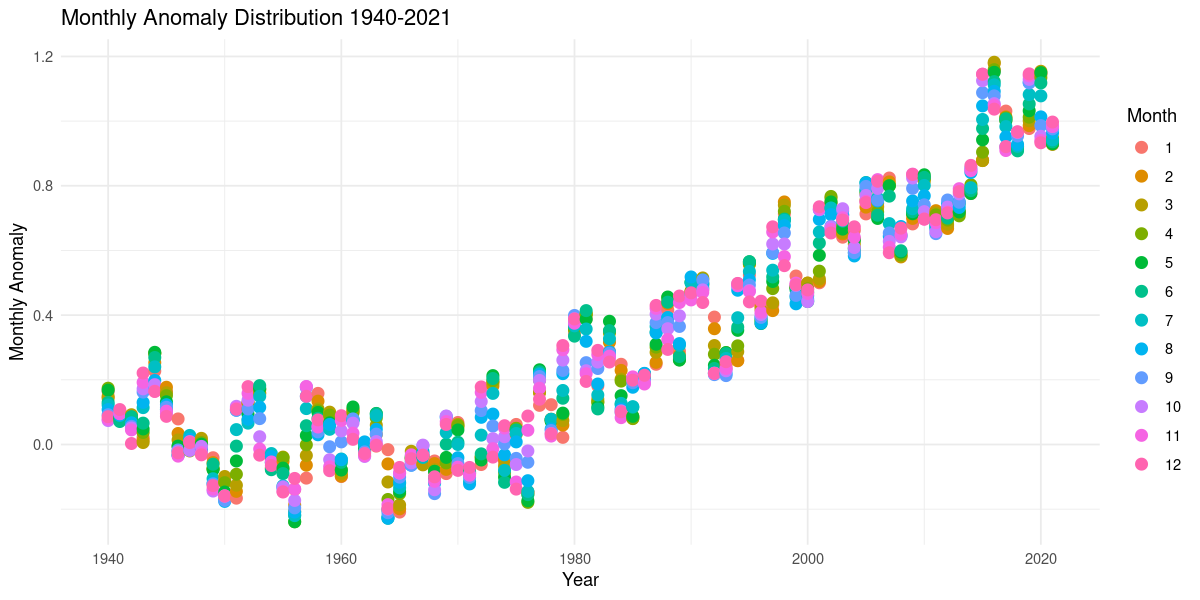

In [399]:
ggplot(temps, aes(x = Year, y = Annual.Anomaly, color = factor(Month))) +
  geom_point(size = 3) +
  labs(title = 'Monthly Anomaly Distribution 1940-2021',
       x = 'Year',
       y = 'Monthly Anomaly',
       color = 'Month') +
  theme_minimal()

### In this dataset we can see the monthly and annual anomalies in temperature increase as time goes on, this could indicate impactful changes in weather

## 4. Machine Learning Modeling - KNN

- allX and yall create two vectors which are extracted from the 'temps' data frame. 
    - allX contains the 'Year' column
    - allY contains ten times the values in the 'Monthly.Anomaly' column.

In [348]:
allX = temps$Year  
allY = 10*temps$Monthly.Anomaly 

temps = data.frame(allX, allY)  

set.seed(123)

train = temps[tr,]
test = temps[-tr, ]
head(train)
head(test)

##Reference: Dr. Samara's Code 

,allX,allY
,<int>,<dbl>
415,1974,-0.03
463,1978,1.26
179,1954,1.14
526,1983,2.00
195,1956,-3.25
938,2018,8.81


,allX,allY
,<int>,<dbl>
1,1940,0.76
2,1940,2.74
3,1940,2.03
4,1940,3.51
7,1940,2.54
9,1940,0.95


## <mark> a. RMSE

In [349]:
outR = numeric(nk)
inR = numeric(nk)

for (i in 1:nk) {
  kmod = kknn(allY ~ allX, train = train, test = test, k = kvec[i], kernel = "rectangular")
  kmodtr = kknn(allY ~ allX, train = train, test = train, k = kvec[i], kernel = "rectangular")
  outR[i] = sqrt(mean((test[, "allY"] - kmod$fitted)^2))
  inR[i] = sqrt(mean((train[, "allY"] - kmodtr$fitted)^2))
}

head(outR)
head(inR)
smolK = which.min(outR)

##Reference: Dr. Samara's Code 

[1] 2.291293 2.088846 1.867304 1.814410 1.690103 1.685461

[1] 2.084106 1.817723 1.647660 1.577206 1.528445 1.516235

## <mark> b. Bias Variance Trade Off </mark>

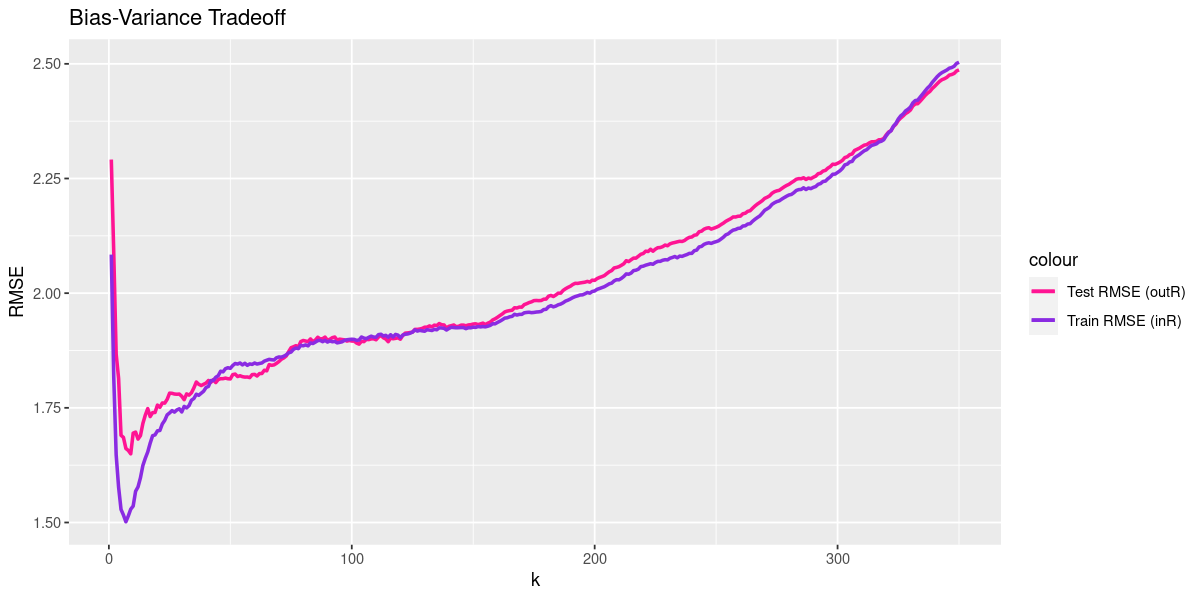

In [350]:
df = data.frame(k = kvec, outR = outR, inR = inR)

ggplot(df, aes(x = k)) +
  geom_line(aes(y = outR, color = "Test RMSE (outR)"), size = 1) +
  geom_line(aes(y = inR, color = "Train RMSE (inR)"), size = 1) +
  labs(x = "k", y = "RMSE", title = "Bias-Variance Tradeoff") +
  scale_color_manual(values = c("Test RMSE (outR)" = "deeppink1", "Train RMSE (inR)" = "blueviolet"))


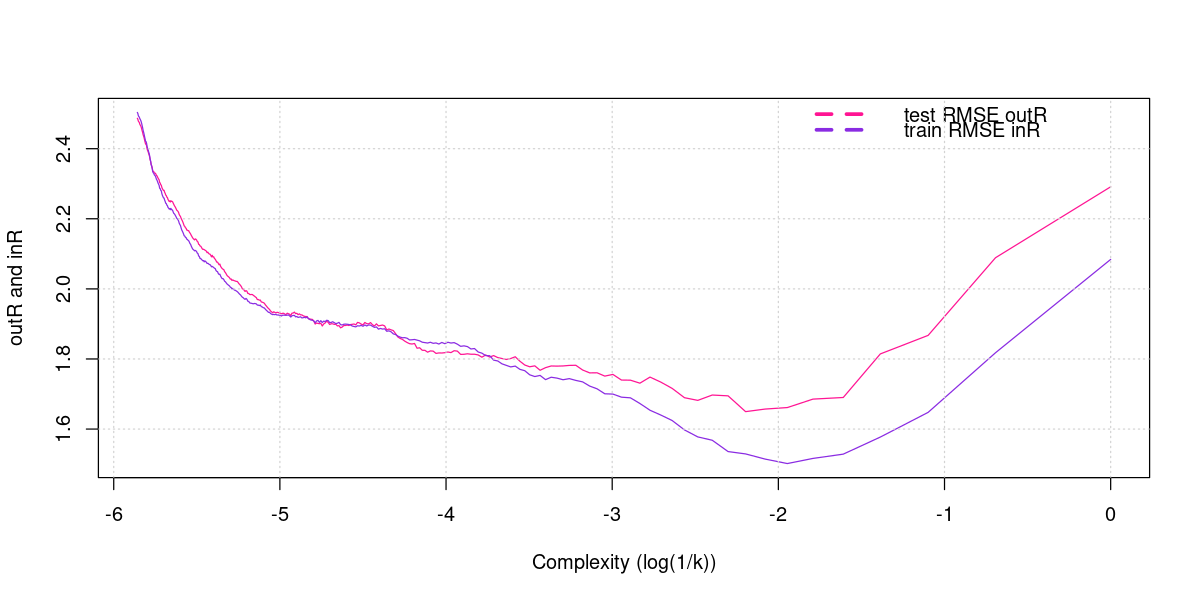

In [351]:
plot(log(1/kvec),outR,type="l",
     xlab="Complexity (log(1/k))",ylab="outR and inR",
     col="deeppink1",ylim=range(inR))

lines(log(1/kvec),inR,col="blueviolet")
legend(x = "topright",          
       legend = c("test RMSE outR", "train RMSE inR"),  
       lty = c(2, 2),          
       col = c("deeppink1", "blueviolet"),           
       lwd = 3,                
       bty = "n")   
grid()

##Reference: Dr. Samara's Code 

## <mark> C. KNN Visual </mark>

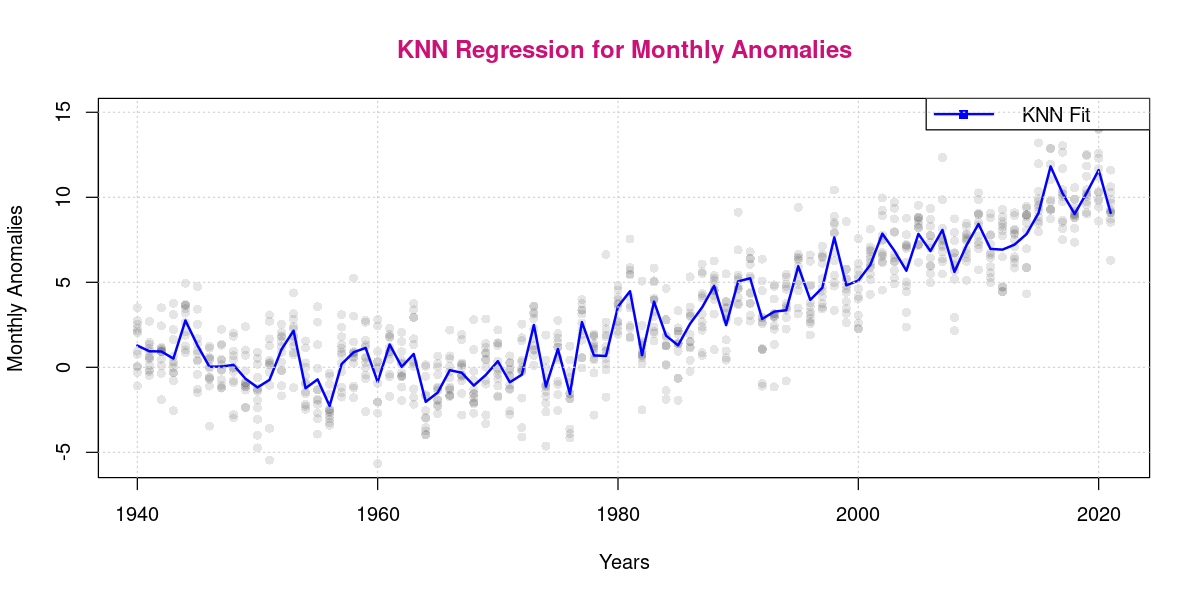

In [352]:
sorted = temps[order(temps$allX), ]


kmod = kknn(allY ~ allX, temps, test = sorted, k = smolK, kernel = "rectangular")


plot(temps$allX, temps$allY, pch = 16, col = rgb(0, 0, 0, 0.1), xlab = "Years", ylab = "Monthly Anomalies", main = "")
lines(sorted$allX, kmod$fitted, col = "blue", lwd = 2)


legend("topright", legend = "KNN Fit", col = "blue", lty = 1, lwd = 2, pch = 15)

title(main = "KNN Regression for Monthly Anomalies", sub = "", col.main = "deeppink3", col.sub = "darkred")

grid()

##Reference: Dr. Samara's Code 


#### <mark> i. KNN regression ggplot with no line</mark>

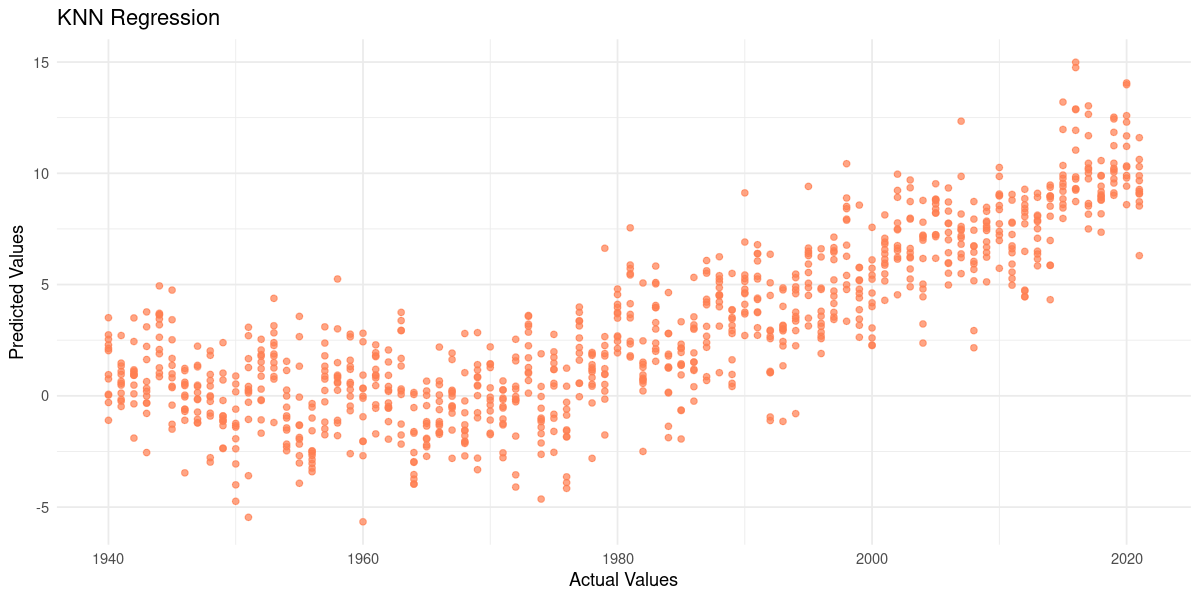

In [353]:
results = data.frame(y_test = allX, predictions = allY)

ggplot(results, aes(x = y_test, y = predictions)) +
  geom_point(color = "coral", alpha = 0.7) +
  labs(x = "Actual Values", y = "Predicted Values", title = "KNN Regression") +
  theme_minimal()

## Conclusion

- In the given visualizations we can see the bias variance shows low bias and low variance which is desirable, and the KNN shows a positive slope with the dataset showing a positive correlation/association. 
- Given the range, there can be seen increases of monthly temperature anomalies each subsequent year indicating climate change. 
- The KNN visual also indicates there were not as many monthly anomalies from 1940 to around the late 1900s
- Looking at the KNN with k being 300 it shows some flattening of the curve but there were too many NaNs in the recent years, which could be contributing to that
- Examining yearly anomalies could give a bigger picture into the the changes over the decades


<img src="https://payload.cargocollective.com/1/3/112959/8620936/hourglass2.gif">


## References

1. https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error
2. https://math.la.asu.edu/~samara/MLearn-lectures/measuring-accuracy.html
3. https://r-graph-gallery.com/42-colors-names.html
4. https://payload.cargocollective.com/1/3/112959/8620936/hourglass2.gif
5. https://nmcdn.io/e186d21f8c7946a19faed23c3da2f0da/8ed2672177464f2e9b193130d1000c50/files/blog/what-climate-change-looks-like-in-6-gifs/climate_change_map.gif
6. https://www.kaggle.com/datasets/joebeachcapital/global-earth-temperatures/data
7. https://mathds.asu.edu/user/jlvesper/notebooks/dat402_88985/HW2/HW2.ipynb
8. https://plotly.com/ggplot2/knn-classification/

